#  Scikit-learn(sklearn)
This notebook denonstrates some of the moset useful functions of Scikit-Learn Library

What we ar going to cover:
0. An en-to-en Scikit-learn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm/moel for our problems
3. Fit the model/algorithm/Estimator an use it to make predictions on our data
4. Evaluating a Model
5. Improve a model
6. Save and load a trained model
7. Putting it all together

## 0. An en-to-end Scikit-learn workflow

In [3]:
# Standard Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# 1. Get the data ready
import pandas as pd
heart_disease = pd.read_csv('heart-disease.csv')
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
# Create X (feature matrix)
X = heart_disease.drop('target', axis=1)

# Create y (labels)
y = heart_disease['target']

In [6]:
# 2. choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# we'll keep the default hyperparameters
clf.get_params() #these are randomForest Parameters (clf.get_params)

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [7]:
# 3. Fit the model to the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [8]:
clf.fit(X_train, y_train);

In [9]:
# Make a prediction
y_label = clf.predict(np.array[(0,2,3,4)])

TypeError: 'builtin_function_or_method' object is not subscriptable

In [10]:
X_train.shape

(242, 13)

In [11]:
X_test.shape

(61, 13)

In [12]:
y_train.shape

(242,)

In [13]:
y_test.shape

(61,)

In [14]:
heart_disease.shape

(303, 14)

In [15]:
y_preds = clf.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [16]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [17]:
#4. Evaluate the model
clf.score(X_train,y_train)

1.0

In [18]:
clf.score(X_test, y_test)

0.8524590163934426

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [20]:
confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 4, 28]], dtype=int64)

In [21]:
accuracy_score(y_test, y_preds)

0.8524590163934426

In [22]:
# 5. Improve a model
# Try different amount of n_estimators
np.random.seed(42)
for i in range(10, 70, 10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, y_test) * 100:.2f}%")
    print ("")

Trying model with 10 estimators...
Model accuracy on test set: 85.25%

Trying model with 20 estimators...
Model accuracy on test set: 80.33%

Trying model with 30 estimators...
Model accuracy on test set: 83.61%

Trying model with 40 estimators...
Model accuracy on test set: 80.33%

Trying model with 50 estimators...
Model accuracy on test set: 86.89%

Trying model with 60 estimators...
Model accuracy on test set: 83.61%



In [23]:
# 6. Save a model and load it
import pickle
pickle.dump(clf, open("random_forest_model_1.pkl","wb"))

In [24]:
loaded_model = pickle.load(open('random_forest_model_1.pkl',"rb"))
loaded_model.score(X_test, y_test)

0.8360655737704918

In [25]:
import sklearn
sklearn.__version__ , sklearn.show_versions()


System:
    python: 3.10.9 | packaged by Anaconda, Inc. | (main, Mar  1 2023, 18:18:15) [MSC v.1916 64 bit (AMD64)]
executable: C:\Users\Admin\anaconda3\python.exe
   machine: Windows-10-10.0.19045-SP0

Python dependencies:
      sklearn: 1.2.1
          pip: 22.3.1
   setuptools: 65.6.3
        numpy: 1.23.5
        scipy: 1.10.0
       Cython: None
       pandas: 1.5.3
   matplotlib: 3.7.0
       joblib: 1.1.1
threadpoolctl: 2.2.0

Built with OpenMP: True

threadpoolctl info:
       filepath: C:\Users\Admin\anaconda3\Library\bin\mkl_rt.1.dll
         prefix: mkl_rt
       user_api: blas
   internal_api: mkl
        version: 2021.4-Product
    num_threads: 2
threading_layer: intel

       filepath: C:\Users\Admin\anaconda3\vcomp140.dll
         prefix: vcomp
       user_api: openmp
   internal_api: openmp
        version: None
    num_threads: 4


('1.2.1', None)

## 1. Getting pur data ready to be used with machine learning

Three main things we have to do
1. split the data into features and labels(usually `X` & `Y`)
2. Filling (also called imputing) or disregarding missing values
3. Converting non-numerical values to numerical values (also called feature encoding)

In [26]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [27]:
X = heart_disease.drop('target', axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [28]:
y = heart_disease['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [29]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [30]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [31]:
X.shape[0]*0.8

242.4

In [32]:
len(heart_disease)

303

### 1.1 Makesure it's all numerical

In [33]:
car_sales = pd.read_csv('car-sales-extended.csv')
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [34]:
car_sales['Doors'].value_counts()

4    856
5     79
3     65
Name: Doors, dtype: int64

In [35]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [36]:
len(car_sales)

1000

In [37]:
# Split the data into X/Y
X= car_sales.drop('Price', axis=1)
y= car_sales['Price']

# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [38]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(x_test, y_test)

ValueError: could not convert string to float: 'Toyota'

In [39]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorial_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one-hot',
                                 one_hot,
                                 categorial_features)],
                               remainder='passthrough')
transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [40]:
pd.DataFrame(transformed_X).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0


In [41]:
dummies = pd.get_dummies(car_sales[['Make', 'Colour', 'Doors']])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [42]:
# Let's refit the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X,y,test_size=0.2)
model.fit(X_train, y_train);

In [43]:
model.score(X_test, y_test)

0.3235867221569877

### What if thre wer missing values
1. Fill them with some values(also know as imputation)
2. Remove the samples with missing ata altogether
3. 

In [44]:
# Import car sales missing data
car_sales_missing = pd.read_csv('car-sales-extended-missing-data.csv')
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [45]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [46]:
# Create X and y
X= car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']

In [47]:
# lets's try and convert our data to numbers
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
tranformer = ColumnTransformer([('one_hot',
                                one_hot,
                                categorical_features)],
                              remainder='passthrough')
transformed_X = transformer.fit_transform(X)
transformed_X

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

In [48]:
print(car_sales_missing.to_string())

       Make Colour  Odometer (KM)  Doors    Price
0     Honda  White        35431.0    4.0  15323.0
1       BMW   Blue       192714.0    5.0  19943.0
2     Honda  White        84714.0    4.0  28343.0
3    Toyota  White       154365.0    4.0  13434.0
4    Nissan   Blue       181577.0    3.0  14043.0
5     Honda    Red        42652.0    4.0  23883.0
6    Toyota   Blue       163453.0    4.0   8473.0
7     Honda  White            NaN    4.0  20306.0
8       NaN  White       130538.0    4.0   9374.0
9     Honda   Blue        51029.0    4.0  26683.0
10   Nissan  White       167421.0    4.0  16259.0
11   Nissan  Green        17119.0    4.0   6160.0
12   Nissan  White       102303.0    4.0  16909.0
13      NaN  White       134181.0    4.0  11121.0
14    Honda   Blue       199833.0    4.0  18946.0
15   Toyota   Blue       205592.0    4.0  16290.0
16   Toyota    Red        96742.0    4.0  34465.0
17      BMW  White       194189.0    5.0  17177.0
18   Nissan  White        67991.0    3.0   9109.0


In [49]:
print (pd.DataFrame(transformed_X))

                                                     0
0      (0, 1)\t1.0\n  (0, 9)\t1.0\n  (0, 12)\t1.0\n...
1      (0, 0)\t1.0\n  (0, 6)\t1.0\n  (0, 13)\t1.0\n...
2      (0, 1)\t1.0\n  (0, 9)\t1.0\n  (0, 12)\t1.0\n...
3      (0, 3)\t1.0\n  (0, 9)\t1.0\n  (0, 12)\t1.0\n...
4      (0, 2)\t1.0\n  (0, 6)\t1.0\n  (0, 11)\t1.0\n...
..                                                 ...
995    (0, 3)\t1.0\n  (0, 5)\t1.0\n  (0, 12)\t1.0\n...
996    (0, 4)\t1.0\n  (0, 9)\t1.0\n  (0, 11)\t1.0\n...
997    (0, 2)\t1.0\n  (0, 6)\t1.0\n  (0, 12)\t1.0\n...
998    (0, 1)\t1.0\n  (0, 9)\t1.0\n  (0, 12)\t1.0\n...
999    (0, 3)\t1.0\n  (0, 6)\t1.0\n  (0, 12)\t1.0\n...

[1000 rows x 1 columns]


In [50]:
car_sales_missing['Doors'].value_counts()

4.0    811
5.0     75
3.0     64
Name: Doors, dtype: int64

### Option 1: Fill missing data with Pandas

In [51]:
# Fill the "Make" column
car_sales_missing['Make'].fillna('missing', inplace=True)

# Fill the 'colour' column
car_sales_missing['Colour'].fillna('missing', inplace=True)

# Fill the "Odometer (KM)" column
car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean(), inplace=True)

# Fill the "Doors" column
car_sales_missing['Doors'].fillna(4, inplace=True)

In [52]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [53]:
# Remove rows with missing price 
car_sales_missing.dropna(inplace=True)

In [54]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [55]:
len(car_sales_missing)

950

In [56]:
X= car_sales_missing.drop('Price', axis=1)
y= car_sales_missing['Price']

In [57]:
# lets's try and convert our data to numbers
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
tranformer = ColumnTransformer([('one_hot',
                                one_hot,
                                categorical_features)],
                              remainder='passthrough')
transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### Option 2: Fill missing values with scikit learn

In [58]:
car_sales_missing = pd.read_csv('car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [59]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [60]:
car_sales_missing.dropna(subset=['Price'], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [61]:
# Split into X & y
X = car_sales_missing.drop('Price', axis=1)
y= car_sales_missing['Price']

In [62]:
X.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

In [63]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing and numerical values with mean
car_imputer = SimpleImputer(strategy='constant', fill_value='missing')
door_imputer = SimpleImputer(strategy='constant', fill_value=4)
num_imputer = SimpleImputer(strategy='mean')

#Define columns
car_features = ['Make', 'Colour']
door_feature = ['Doors']
num_features = ['Odometer (KM)']

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ('car_imputer', car_imputer, car_features),
    ('door_imputer', door_imputer, door_feature),
    ('num_imputer', num_imputer, num_features)
])

#Transform the data
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [64]:
car_sales_filled = pd.DataFrame(filled_X,
                              columns=['Make', 'Colour', 'Doors', 'Odometer (KM)'])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [65]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [66]:
len(car_sales_filled)

950

In [67]:
# lets's try and convert our data to numbers
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
tranformer = ColumnTransformer([('one_hot',
                                one_hot,
                                categorical_features)],
                              remainder='passthrough')
transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [68]:
# Now we got our data as numers and filled (no missing values)
# let's fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                   y,
                                                   test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.21990196728583944

In [69]:
len(car_sales_filled), len(car_sales)

(950, 1000)

### 1. The process of filling in missing values is called imputation
### 2. The process of turning non numerical values into numerical values id called feature engineering 

## 2. Choosing the right estimator/algorithm for your problem

Some things to note:
    * Sklearn refers to machine learning models, algorithms as estimators
    * Classification problem = predicting a category (heart disease or not)
        * Sometimes you'll see `clf` (short for classifier) used as a classification estimator
    * Reression problem - predicting a number (selling price of a car)
    
If you're working on a machine learning problem and looking to use Sklearn and not sure what model you should use, refer to the sklearn machine learning map: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### 2.1 picking a machine learning model for a regression problem
Let's use the California Housing dataset - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

In [70]:
# Get California Housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [71]:
housing_df = pd.DataFrame(housing['data'], columns = housing ['feature_names'])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [72]:
housing_df['target'] = housing ['target']
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [73]:
# Import algorithm
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# Create the data
X = housing_df.drop('target', axis=1)
y = housing_df['target'] # median house price in $100,000s

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model (on the training set)
model = Ridge()
model.fit(X_train, y_train)

#check the score of the model(on the test set)
model.score(X_test, y_test)

0.5758549611440125

what if `Ridge` dindn't work or the score didn't fit our needs?
well, we could always try a different model...
How about we try an ensemble model (an ensembel is a combination of smaller models to try and male better predictions 
                                   than just a single model)
Sklearn ensemble models can be found here: https://scikit-learn.org/stable/modules/ensemble.html
        

In [74]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X = housing_df.drop('target', axis=1)
y = housing_df['target']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Create random forest model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Check the score of the model (on the test set)
model.score(X_test, y_test)

0.8065734772187598

## 2.2 Choosing an estimator for a classification problem
Lets go to the map https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [75]:
heart_disease = pd.read_csv('heart-disease.csv')
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Consulting the map and it says to try Linear SVC

In [76]:
# import the linearSVC estimator class
from sklearn.svm import LinearSVC

# Setip random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiate Linear SVC
clf = LinearSVC()
clf.fit(X_train, y_train)

# Evaluate the LinearSVC
clf.score(X_test, y_test)


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [77]:
heart_disease['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [78]:
# import the RandomForest Classifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setip random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiate RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Evaluate the RandomForestClassifier
clf.score(X_test, y_test)


0.8524590163934426

Tidbit:


    1. If you have stractured data use ensemble methods
    2. of you have unstractured data use deeplearning or transfer learning

## 3. Fit the model / algorithm / estimator on our data and use it to make predictions

### 3.1 Fitting the model to the data

Different names for:
* X = feature, feature variables, data
* y = labels, targets, target variables

In [79]:
# import the RandomForest Classifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setip random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiate RandomForestClassifier
clf = RandomForestClassifier()

# Fit the model to the data (training machine learning model)
clf.fit(X_train, y_train)

# Evaluate the RandomForestClassifier (use the patterns the model has learnt)
clf.score(X_test, y_test)


0.8524590163934426

In [80]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [81]:
y.head(), y.tail()

(0    1
 1    1
 2    1
 3    1
 4    1
 Name: target, dtype: int64,
 298    0
 299    0
 300    0
 301    0
 302    0
 Name: target, dtype: int64)

### 3.2 Make Predictions using machine learning models

2 ways to make predicions:
1. `predict()`
2. `predict_proba()`

In [82]:
# use a trained model to make predictions
clf.predict(np.array[1,7,8,3,4]) # this doesn't work

TypeError: 'builtin_function_or_method' object is not subscriptable

In [83]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [84]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [85]:
# Compare predictions to truth labels to evaluate the model
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [86]:
clf.score(X_test, y_test)

0.8524590163934426

In [87]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

Make predictions wiht predict_proba()


In [88]:
# predict_proba() returns probabilities of a clsssification label
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [89]:
# Let's predict () on thesame data...
clf.predict(X_test[:5])


array([0, 1, 1, 0, 1], dtype=int64)

In [90]:
heart_disease['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

`predict()` can also be used for regression models

In [91]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [92]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X = housing_df.drop('target', axis=1)
y = housing_df['target']

# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Create model instance
model = RandomForestRegressor()

# Fit the model to the data
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

In [93]:
y_preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  , 1.6525301,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [94]:
np.array([y_test[:10]])

array([[0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
        1.575  , 3.4    , 4.466  ]])

In [95]:
len(y_preds), len(y_test)

(4128, 4128)

In [96]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.32659871732073664

In [97]:
housing_df['target'] 

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

### 4. Evaluating a machine learning model

Three ways to evaluate Scikit=Learn models/estimators: 


    1. Estimator's built-n score() method
    2, THe 'scoring' parameter
    3. Problem-specific metric function
    
You can read more about these here: https://scikit-learn.org/stable/modules/model_evaluation.html

### 4.1 Evaluating a model with the score method

In [98]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

#create X & y
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Create train/test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

# Create classifier model instance
clf = RandomForestClassifier(n_estimators=1000)

#training
clf.fit(X_train, y_train)



RandomForestClassifier(n_estimators=1000)

In [99]:
# the highestvaloue for the score method is 1.0 the lowest is 0.0
clf.score(X_train, y_train)

1.0

In [100]:
clf.score(X_test, y_test)

0.8688524590163934

let's use the score() on our regression algorithm

In [101]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X = housing_df.drop('target', axis=1)
y = housing_df['target']

# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Create model instance
model = RandomForestRegressor(n_estimators = 100)

# Fit the model to the data
model.fit(X_train, y_train)



RandomForestRegressor()

In [102]:
model.score(X_test, y_test)

0.8065734772187598

In [103]:
model.score(X_train, y_train)

0.9736801960414609

In [104]:
y_test.mean()

2.0550030959302323

### 4.2 Evaluating a model using the `Scoring` parameter 

In [105]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

#create X & y
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Create train/test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

# Create classifier model instance
clf = RandomForestClassifier(n_estimators=1000)

#training
clf.fit(X_train, y_train);



In [106]:
clf.score(X_test, y_test)

0.8688524590163934

In [107]:
cross_val_score(clf, X, y) # Uses Cross-validation

array([0.83606557, 0.90163934, 0.81967213, 0.8       , 0.78333333])

In [108]:
cross_val_score(clf, X, y, cv=10) # Uses Cross-validation

array([0.87096774, 0.83870968, 0.83870968, 0.9       , 0.9       ,
       0.83333333, 0.73333333, 0.83333333, 0.73333333, 0.83333333])

In [109]:
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(X_test, y_test)

#Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))
                              
# Compare the two
clf_single_score, clf_cross_val_score

(0.8688524590163934, 0.8215300546448088)

In [110]:
# Default scoring param

In [111]:
# Scoring parameter set to None by default
cross_val_score(clf, X, y, scoring=None)

array([0.83606557, 0.8852459 , 0.80327869, 0.8       , 0.76666667])

### 4.2.1 Classification model evaluation metrics


1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

**Accuracy**

In [112]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [113]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf,X,y)

In [114]:
np.mean(cross_val_score)

0.8248087431693989

In [115]:
print (f"Heart Disease Classifier Accuracy: {np.mean(cross_val_score) * 100:.2f}%")

Heart Disease Classifier Accuracy: 82.48%


**Area under the recieiver operating characteristic curve (AUC/ROC)**


* Areau Under Curve (AUC)
* ROC Curve

ROC curves are a comparison of a model's true positive rate (tpr) versus a models false positive rate (fpr)

* True Positive = model predicts 1 when truth is 1
* False positive  = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative  = model predict 0 when truth is 1

In [116]:
# Create X_test ... etc
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [117]:
from sklearn.metrics import roc_curve

# Fi the classifier
clf.fit(X_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10]

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

In [118]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [119]:
# Calculate fpr, tpr and threshold
fpr, tpr, thresholds = roc_curve(y_test,y_probs_positive)

# Check the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

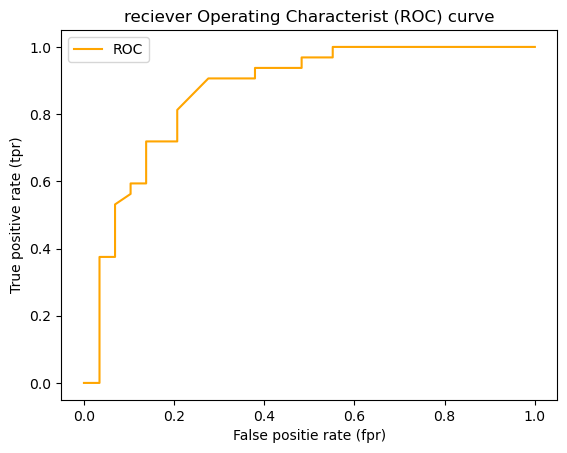

In [120]:
# Create a fuction for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color='orange', label='ROC')
    # Plot line with no predictive power (baseline)
    # plt.plot([0,1],[0,1], color='darkblue', linestyle='--', label='Guessing')
    
    # Customize th plot
    plt.xlabel('False positie rate (fpr)')
    plt.ylabel('True positive rate (tpr)')
    plt.title('reciever Operating Characterist (ROC) curve')
    plt.legend()
    plt.show
plot_roc_curve(fpr,tpr)

In [121]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

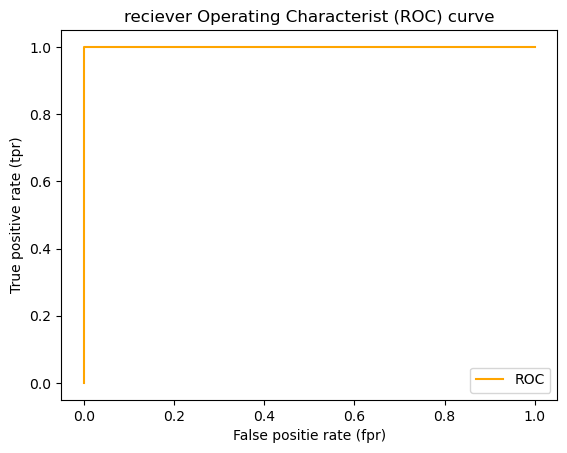

In [122]:
# Plot perfect ROC curve and UC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [123]:
# perfect AUC score
roc_auc_score(y_test, y_test)

1.0

**Confusion Matrix**

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was
supposed to predict

In essence, giving you an idea of where the model is getting confused

In [124]:
# See here for sklearn confusion matrix - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [125]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,
           y_preds,
           rownames=['Actual Label'],
           colnames=['Predicted Labels'])

Predicted Labels,0,1
Actual Label,,
0,23,6
1,6,26


<Axes: >

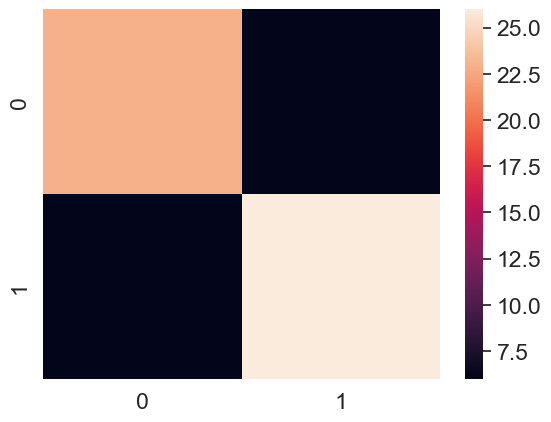

In [126]:
# Make our confusion matrix more visual with Seaborn's heatmap()
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot is using seaborn
sns.heatmap(conf_mat)

### Crearting a confusion matrix using Scikit-learn
To use the new methods of creating  confusion matrix with Scikit-learn.you will need sklearn verion 1.0+

In [127]:
import sklearn
sklearn.__version__

'1.2.1'

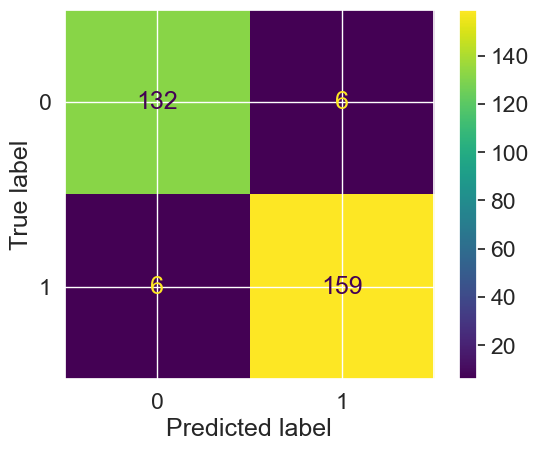

In [128]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y)

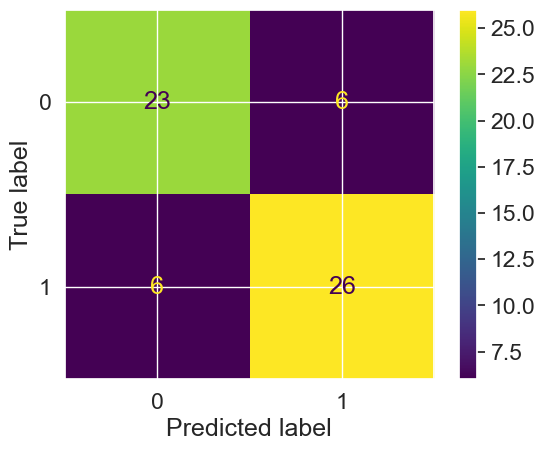

In [129]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                       y_pred=y_preds)

### Classification Report

In [130]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



Refference: https://scikit-learn.org/stable/modules/model_evaluation.html

In [131]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000) # model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                  disease_preds,
                                  output_dict=True))

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


### 4.2.2 Regression model evaluation metrics
Model evaluation ,etrics documentation - https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

The ones we are going to cover are:
1. R-squared or coefficient of determination
2. Mean absolute error(MAE)
3. Mean Squared Error(MSE)

In [132]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop('target', axis = 1)
y = housing_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

RandomForestRegressor()

In [133]:
model.score(X_test, y_test)

0.8065734772187598

In [134]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [135]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [136]:
y_test.mean()

2.0550030959302323

In [137]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [138]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [139]:
r2_score(y_true=y_test,
        y_pred=y_test_mean)

0.0

In [140]:
r2_score(y_true=y_test,
        y_pred=y_test)

1.0

**Mean absolute error (MAE)**

MAE is the average of the absolute difference between predictions and actual values.
it gives you an idea of how wron a models predictions are.

In [141]:
# MAE
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.32659871732073664

In [142]:
y_preds, y_test

(array([0.49384  , 0.75494  , 4.9285964, ..., 4.8363785, 0.71782  ,
        1.67901  ]),
 20046    0.47700
 3024     0.45800
 15663    5.00001
 20484    2.18600
 9814     2.78000
           ...   
 15362    2.63300
 16623    2.66800
 18086    5.00001
 2144     0.72300
 3665     1.51500
 Name: target, Length: 4128, dtype: float64)

In [143]:
df = pd.DataFrame(data={'actual values': y_test,
                       "predicted values" : y_preds})
df['differences'] = df['predicted values'] - df['actual values']
df.head(10)

,actual values,predicted values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.543160,0.357160
9814,2.78000,2.331760,-0.448240
13311,1.58700,1.652530,0.065530
7113,1.98200,2.343230,0.361230
7668,1.57500,1.661820,0.086820
18246,3.40000,2.474890,-0.925110
5723,4.46600,4.834478,0.368478


In [144]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [145]:
# MAE using formulas and differnces
np.abs(df['differences']).mean() 

0.32659871732073664

**Mean squared error (MAE)**
MSE is the mean of the square of the errors between actual and predicted values

In [146]:
# Mean squared eror
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

0.2534678520824551

In [147]:
df['squared_differences'] = np.square(df['differences'])
df.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919


In [148]:
# Calculate MSE by jand
squared  = np.square(df['differences'])
squared.mean()

0.2534678520824551

In [149]:
df_large_error = df.copy()
df_large_error.iloc[0]['squared_differences'] = 16

In [150]:
df_large_error.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,16.000000
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919


In [151]:
# Claculate MSE with large error
df_large_error['squared_differences'].mean()

0.2573437523766412

In [152]:
df_large_error.iloc[1:100] = 20
df_large_error.head(100)

,actual values,predicted values,differences,squared_differences
20046,0.477,0.49384,0.01684,16.0
3024,20.000,20.00000,20.00000,20.0
15663,20.000,20.00000,20.00000,20.0
20484,20.000,20.00000,20.00000,20.0
9814,20.000,20.00000,20.00000,20.0
...,...,...,...,...
6052,20.000,20.00000,20.00000,20.0
15975,20.000,20.00000,20.00000,20.0
14331,20.000,20.00000,20.00000,20.0
1606,20.000,20.00000,20.00000,20.0


In [153]:
# Clculate MSE with large error
df_large_error['squared_differences'].mean()

0.7334180712088106

### 4.2.3 Finally using the scoring parameter

In [154]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

clf = RandomForestClassifier(n_estimators=100)

In [155]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv=5, scoring=None) # if scoring equals none then default scoring matrix is used which is accuracy for classification models
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [156]:
# cross-validated accuracy
print (f"The cross-validated accuracy is:{np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is:82.48%


In [157]:
np.random.seed(42)

cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [158]:
# cross-validated accuracy
print (f"The cross-validated accuracy is:{np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is:82.48%


In [159]:
cv_precision = cross_val_score(clf,X,y,cv=5,scoring="precision")
cv_precision

array([0.76315789, 0.90322581, 0.83870968, 0.79411765, 0.74358974])

In [160]:
# cross-validated precision

print (f"The cross-validated accuracy is:{np.mean(cv_precision)*100:.2f}%")

The cross-validated accuracy is:80.86%


In [161]:
# Recall
cv_recall = cross_val_score(clf,X,y,cv=5,scoring='recall')
cv_recall

array([0.87878788, 0.84848485, 0.78787879, 0.78787879, 0.90909091])

In [162]:
# cross-validated recall

print (f"The cross-validated accuracy is:{np.mean(cv_recall)*100:.2f}%")

The cross-validated accuracy is:84.24%


Let's see the scoring parameter being used for a regression problem

In [163]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop('target', axis=1)
y = housing_df['target']

model = RandomForestRegressor(n_estimators=100)

In [164]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=3, scoring=None)
np.mean(cv_r2)

0.6545458023124507

In [165]:
cv_r2

array([0.62156985, 0.72075819, 0.62130937])

In [166]:
# Mean squared error
cv_mse = cross_val_score(model,X,y,cv=3, scoring='neg_mean_squared_error')
np.mean(cv_mse)

-0.4626304189468596

In [167]:
cv_mse

array([-0.51816064, -0.33163551, -0.53809511])

In [168]:
# Mean absolute error
cv_mae = cross_val_score(model, X, y, cv=3, scoring='neg_mean_absolute_error')
np.mean(cv_mae)

-0.4820330437306202

In [169]:
cv_mae

array([-0.5173712 , -0.4219676 , -0.50676033])

### 4.3 Using different evalution metrics as Scikit-Learn functions

The 3rd way to evalute scikit-learn machine learning models/estimators is to use the `sklearn.metrics` module - https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [170]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# create X & y
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# split the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# create the model
clf = RandomForestClassifier()

# Fit the model
clf.fit(X_train, y_train)

# Make predictions
y_preds = clf.predict(X_test )

# Evaluate model using evaluation functions
print ("Classifier metrics on the test set")
print (f"Accuracy:{accuracy_score(y_test, y_preds)*100:.2f}%", accuracy_score(y_test, y_preds))
print (f"Precision:{precision_score(y_test, y_preds)*100:.2f}%", precision_score(y_test, y_preds))
print (f"Recall:{recall_score(y_test, y_preds)*100:.2f}%", recall_score(y_test, y_preds))
print (f"F1:{f1_score(y_test, y_preds)*100:.2f}%", f1_score(y_test, y_preds))

Classifier metrics on the test set
Accuracy:80.33% 0.8032786885245902
Precision:82.14% 0.8214285714285714
Recall:76.67% 0.7666666666666667
F1:79.31% 0.793103448275862


In [171]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create X & y
X = housing_df.drop('target', axis=1)
y = housing_df['target']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Create model
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

# Evaluate model using evaluation functions
print ('Regression metrics on the test set')
print (f"R2 score: {r2_score(y_test, y_preds)}")
print (f"MAE: {mean_absolute_error(y_test, y_preds)}")
print (f"MAE: {mean_squared_error(y_test, y_preds)}")

Regression metrics on the test set
R2 score: 0.8065734772187598
MAE: 0.32659871732073664
MAE: 0.2534678520824551


## 5. Improving a model

First predictions = baseline predictions
First model = baseline model

From a data perspective:
* Could we collect more data? (generally the more data, the better) 
* Could we improve our data? 

From a model perspective:
* Is there a better model we could use?
* Could we improve the current model?

Hyperparameters vs parameters

* Parameters = model finds these patterns in data
* Hyperparameters = settings in models you can adjiust to potentially improve its ability to find patterns

Three ways to djust hyperparameters
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [172]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()


In [173]:
clf.get_params() #these are hyperparameters

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 tunning hyperparameters by hand

let's make 3 sets, training, validation asn test.

In [174]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

we're going to try and adjust:

* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [175]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_preds labels
    on a classification.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy,2),
                   "precision" : round(precision, 2),
                   "recall" : round (recall, 2),
                   "f1" : round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print (f"Precision: {precision:.2f}")
    print (f"Recall:{recall:.2f}")
    print (f"F1 score: {f1:.2f}")
    
    return metric_dict

In [177]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# shuffle the data

heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled['target']

# Split the data into train, validation and test sets
train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 15% of data
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

len(X_train), len(X_valid), len(X_test)


clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make baseline predictions
y_preds = clf.predict(X_valid)

# Evalute the classifier on validation set
baseline_metrics = evaluate_preds (y_valid, y_preds)
baseline_metrics

Acc: 82.22%
Precision: 0.81
Recall:0.88
F1 score: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

**Manual Hyperparameter tunning**

In [182]:
np.random.seed(42)

#Create a second classifier with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(X_train, y_train)

# Make predictions with different hyperparameters
y_preds_2 = clf_2.predict(X_valid)

# Evaluate the 2nds classifier
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

Acc: 82.22%
Precision: 0.84
Recall:0.84
F1 score: 0.84


In [187]:
clf_3 = RandomForestClassifier(n_estimators=100,
                               max_depth=10)
clf_3.fit(X_train, y_train)

y_preds_3 = clf_3.predict(X_valid)

clf_3_metrics = evaluate_preds(y_valid, y_preds_3)

Acc: 82.22%
Precision: 0.81
Recall:0.88
F1 score: 0.85


### 5.2 Hyperparameter tunning with Randomized SearchCV

In [191]:
from sklearn.model_selection import RandomizedSearchCV

grid = {'n_estimators':[10, 100, 200, 500, 1000, 1200],
       'max_depth':[None, 5, 5, 10, 20, 30],
       'max_features':['sqrt'],
        'min_samples_split':[2,4,6],
        'min_samples_leaf':[1,2,4]}

np.random.seed(42)

# Split into X & y
X = heart_disease_shuffled.drop('target', axis=1)
y = heart_disease_shuffled['target']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=10, # number of models to try
                           cv = 5,
                            verbose=2)

# fit the randomizedSearchCV version of clf
rs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   1.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   1.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   1.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   1.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   1.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 5, 10, 20, 30],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [193]:
rs_clf.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10}

In [195]:
# Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 78.69%
Precision: 0.76
Recall:0.79
F1 score: 0.77


### 5.3 Hyperparameter tuning with GridSearchCV

In [197]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 5, 10, 20, 30],
 'max_features': ['sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [203]:
grid_2 = {'n_estimators': [100, 200, 500],
         'max_depth': [10],
         'max_features': ['sqrt'],
         'min_samples_split': [2],
         'min_samples_leaf': [1, 2]}


In [210]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# Split into X & y
X = heart_disease_shuffled.drop('target', axis=1)
y = heart_disease_shuffled['target']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                            param_grid=grid_2,
                            cv = 5,
                            verbose=2)

# fit the GridSearchCV version of clf
gs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200;

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [10], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [2],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [211]:
gs_clf.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [212]:
gs_y_preds = gs_clf.predict(X_test)

# evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 80.33%
Precision: 0.75
Recall:0.86
F1 score: 0.80


**let's compare our different models metrics**

<Axes: >

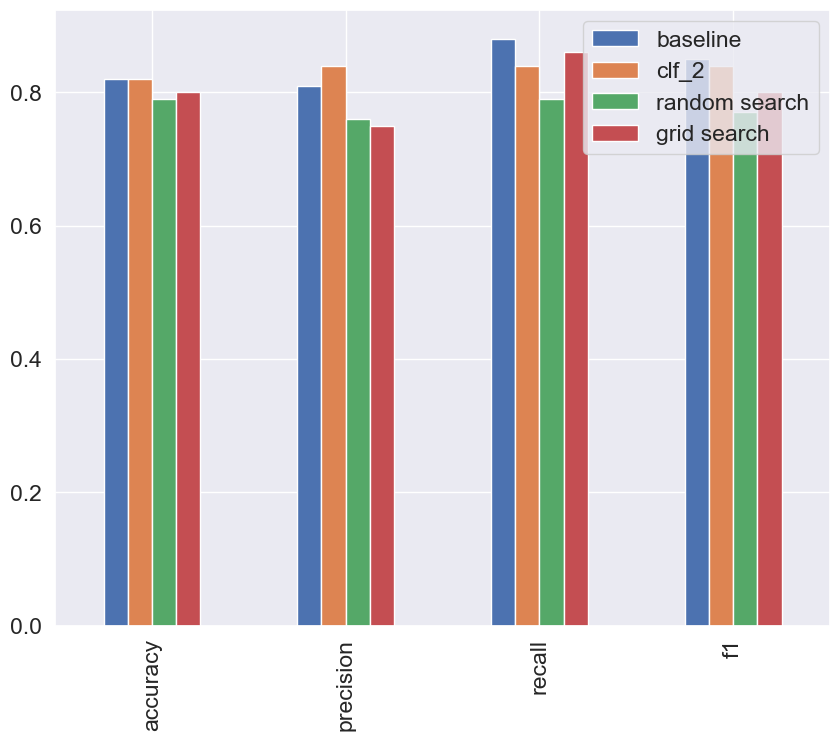

In [213]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                              "clf_2": clf_2_metrics,
                              "random search" : rs_metrics,
                              "grid search": gs_metrics})
compare_metrics.plot.bar(figsize=(10,8))

### 6. Saving and loading trained Machine learning models
To ays to save and load machine learning models:
1. With Python's `pickle` module
2. With the `joblib` module

In [215]:
import pickle

# Save an existing model to file
pickle.dump(gs_clf, open("gs_random_forest_model_1.pkl", "wb"))

In [216]:
# load a savedd model
loaded_pickle_model = pickle.load(open('gs_random_forest_model_1.pkl', "rb"))

In [217]:
# Make some predictions
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

Acc: 80.33%
Precision: 0.75
Recall:0.86
F1 score: 0.80


{'accuracy': 0.8, 'precision': 0.75, 'recall': 0.86, 'f1': 0.8}

In [ ]:
Acc: 80.33%
Precision: 0.75
Recall:0.86
F1 score: 0.80

**Joblib**

In [218]:
from joblib import dump, load

# Save model to file
dump(gs_clf,filename='gs_random_forest_model_1.joblib')

['gs_random_forest_model_1.joblib']

In [219]:
# import a saved joblib model
loaded_job_model = load(filename="gs_random_forest_model_1.joblib")

In [222]:
# Make and evaluate joblib predictions
joblib_y_preds = loaded_job_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)

Acc: 80.33%
Precision: 0.75
Recall:0.86
F1 score: 0.80


{'accuracy': 0.8, 'precision': 0.75, 'recall': 0.86, 'f1': 0.8}

## 7. Putting it all together!

In [223]:
data = pd.read_csv("car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [224]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [225]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps we want to do (all in one cell)
1. Fill missing data
2. converte data to numbers
3. build a model on the data

In [233]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

# impoer data and drop rows with missing labels
data = pd.read_csv("car-sales-extended-missing-data.csv")
data.dropna(subset=['Price'], inplace=True)

# Define different features and transformer pipleine
categorical_features = ['Make', 'Colour']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

door_feature = ['Doors']
door_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=4))
])

numeric_features = ['Odometer (KM)']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

# Setup preprocesing steps (fill missing values then convert to numbers)
preprocessor = ColumnTransformer(
transformers=[
    ('cat', categorical_transformer, categorical_features),
    ('door', door_transformer, door_feature),
    ('num', numeric_transformer, numeric_features)
])

# Creating a processing and modelling pipeline
model = Pipeline(steps=[("preprocessor", preprocessor),
                         ('model', RandomForestRegressor())])

# Split data
X = data.drop('Price', axis=1)
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# Fit and score tje model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22188417408787875

In [235]:
data.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

**its's also possible to use gridsearchcv or randomizedsearchcv with our piplein**

In [237]:
# Use GridSearchCV with our regression Piplene
from sklearn.model_selection import GridSearchCV

pipe_grid = {
    "preprocessor__num__imputer__strategy":["mean","median"],
    "model__n_estimators" : [100, 1000],
    "model__max_depth" : [None, 5],
    "model__min_samples_split":[2,4]
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.4s
[CV] END model__max_depth=None, model__min_samples_spli

[CV] END model__max_depth=5, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   2.7s
[CV] END model__max_depth=5, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   2.7s
[CV] END model__max_depth=5, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   2.8s
[CV] END model__max_depth=5, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   2.7s
[CV] END model__max_depth=5, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=5, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=5, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean;

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None, 5],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [100, 1000],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']},
             verbose=2)

In [238]:
gs_model.score(X_test, y_test)

0.3350273243313292

In [240]:
what_were_covering = ['0. An end-to-end Scikit-Learn workflow','1. Getting the data ready','2. Choose the right estimator/algorithm for our problems']
what_were_covering

['0. An end-to-end Scikit-Learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems']